<hr>
Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" \><br><br>
<hr>

Updated: 2019/11/13

#### Load the ferret extension

In [1]:
%load_ext ferretmagic

#### Put data from python

###### First example: 1D array

In [2]:
import numpy as np
b = {}
b['name']='myvar1'                         
x=np.linspace(-np.pi*4, np.pi*4, 500)
b['data']=np.sin(x)/x
b.keys()

dict_keys(['name', 'data'])

A dataset must have been opened before putting data to ferret to get list of variables latter.

https://github.com/NOAA-PMEL/PyFerret/issues/64

In [3]:
%%ferret
use levitus_climatology    

In [4]:
%ferret_putdata --axis_pos (0,1,2,3,4,5) b

Message: b is now available in ferret as myvar1

currently SET data sets:
 1> /opt/ferret_dsets/data/levitus_climatology.cdf (default)
 name title I J K L
 TEMP TEMPERATURE 1:360 1:180 1:20 ...
 SALT SALINITY 1:360 1:180 1:20 ...
 ------ Python Variables ------
 MYVAR1 myvar1 1:500 ... ... ... ... ...


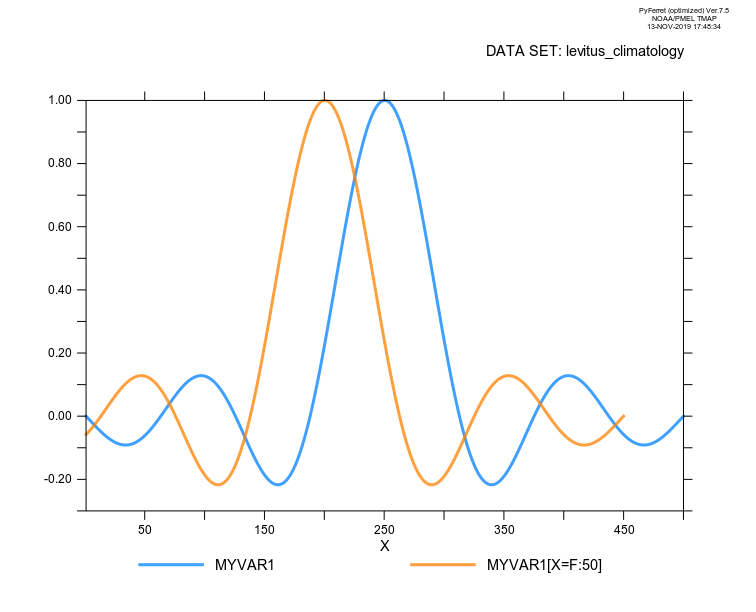

In [5]:
%%ferret
set text/font=arial

show data
ppl color 2, 0, 50, 100, 75
ppl color 3, 100, 50, 0, 75
plot/thick=3/color myvar1, myvar1[x=@shf:50]

###### Second example: 3D array (XYZ)

Create a dummy 3D array (XY and a Z axis)

In [6]:
nlons, nlats, dim3 = (145, 73, 10)

lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
lons = np.linspace(0, 2 * np.pi, nlons)
lons, lats = np.meshgrid(lons, lats, indexing='ij')

wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

lats = np.rad2deg(lats)
lons = np.rad2deg(lons)
data2D = wave + mean 

myaxis = np.linspace(1, 1000, dim3)
dataXYZ = np.repeat(np.expand_dims(data2D,axis=-1), dim3, axis=2)

print(dataXYZ.shape)

(145, 73, 10)


Please refer to http://ferret.pmel.noaa.gov/Ferret/documentation/pyferret/data-dictionaries/

In [7]:
import pyferret
data2ferret = {}
data2ferret['name']='myvar2'   
data2ferret['axis_names']=('lons', 'lats', 'depth')
data2ferret['axis_units']=('degrees_east', 'degrees_north', 'meters')
data2ferret['axis_types']=(
                            pyferret.AXISTYPE_LONGITUDE,
                            pyferret.AXISTYPE_LATITUDE,
                            pyferret.AXISTYPE_LEVEL
                        )
data2ferret['axis_coords']=(lons[:,0], lats[0,:], myaxis[:])
data2ferret['data']=dataXYZ
data2ferret.keys()

dict_keys(['name', 'axis_names', 'axis_units', 'axis_types', 'axis_coords', 'data'])

In [8]:
%ferret_putdata data2ferret

Message: data2ferret is now available in ferret as myvar2

currently SET data sets:
 1> /opt/ferret_dsets/data/levitus_climatology.cdf (default)
 name title I J K L
 TEMP TEMPERATURE 1:360 1:180 1:20 ...
 SALT SALINITY 1:360 1:180 1:20 ...
 ------ Python Variables ------
 MYVAR1 myvar1 1:500 ... ... ... ... ...
 MYVAR2 myvar2 1:145 1:73 1:10 ... ... ...


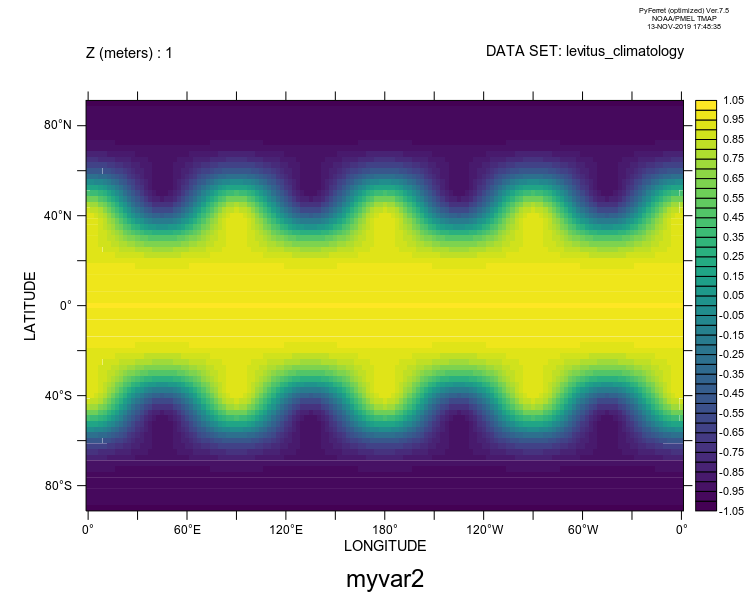

In [9]:
%%ferret
show data
shade myvar2[k=1]

###### Third example: 3D array (XYT)

Create a dummy 3D array (XY and a T axis)

In [10]:
dataXYT = np.reshape(dataXYZ, (nlons, nlats, 1, dim3))
print(dataXYT.shape)

(145, 73, 1, 10)


In [11]:
import pyferret
data2ferret = {}
data2ferret['name']='myvar3'   
data2ferret['axis_names']=('lons', 'lats', '', 'time')
data2ferret['axis_units']=('degrees_east', 'degrees_north', '', '')
data2ferret['axis_types']=(
                            pyferret.AXISTYPE_LONGITUDE,
                            pyferret.AXISTYPE_LATITUDE,
                            pyferret.AXISTYPE_NORMAL,
                            pyferret.AXISTYPE_ABSTRACT
                        )
data2ferret['axis_coords']=(lons[:,0], lats[0,:], None, None)
data2ferret['data']=dataXYT
data2ferret.keys()

dict_keys(['name', 'axis_names', 'axis_units', 'axis_types', 'axis_coords', 'data'])

In [12]:
%ferret_putdata data2ferret

Message: data2ferret is now available in ferret as myvar3

currently SET data sets:
 1> /opt/ferret_dsets/data/levitus_climatology.cdf (default)
 name title I J K L
 TEMP TEMPERATURE 1:360 1:180 1:20 ...
 SALT SALINITY 1:360 1:180 1:20 ...
 ------ Python Variables ------
 MYVAR1 myvar1 1:500 ... ... ... ... ...
 MYVAR2 myvar2 1:145 1:73 1:10 ... ... ...
 MYVAR3 myvar3 1:145 1:73 ... 1:10 ... ...


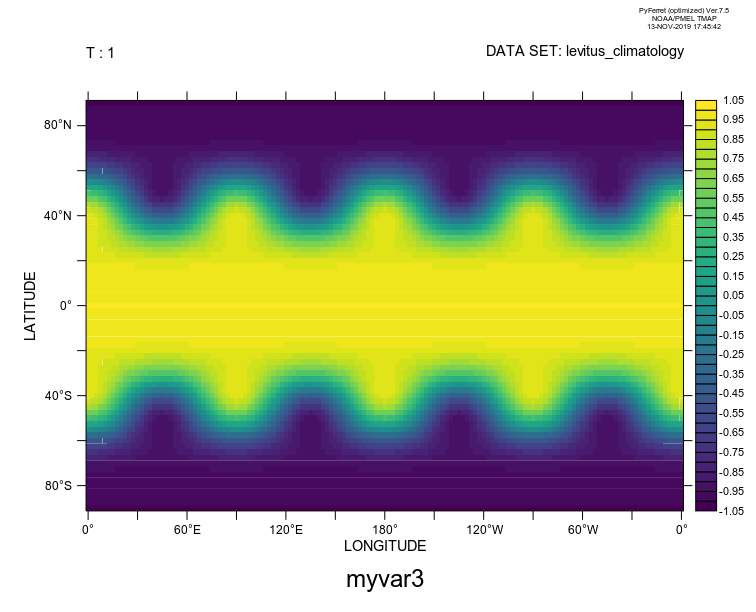

In [13]:
%%ferret
show data
shade myvar3[l=1]